
# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>

# Projet : Prédiction des débordements d'égoûts

La description du projet est disponible à l'adresse suivante :
https://www.kaggle.com/t/8b22a09b27944e458e86e7631c0ccfee

Ce calepin Jupyter de base permet de 

1. Charger les données fournies.
2. Effectuer une analyse exploratoire sommaire des données.
3. Développer un modèle simple de prédiction.
4. Générer le fichier de prédictions à téléverser sur Kaggle.

Dans un premier temps, vous devrez récupérer les données sous l'onglet *data* du site Kaggle. Il y a deux fichiers :
- train.csv
- test.csv

Le fichier *train.csv* contient les données sur lesquelles vous pouvez entraîner votre modèle. Il sera ensuite évaluée sur les données de l'ensemble *test.csv* lorsque vous aurez téléversé vos prédictions sur Kaggle. 

### Consignes

- Vous devez constituer une équipe de 3 à 5 personnes.
- Au moins une solution doit être proposée sur Kaggle.
- Utilisez votre numéro d'équipe pour téléverser vos prédictions sur Kaggle.
- Un seul fichier .ipynb par équipe faisant office de rapport et permettant de reproduire vos meilleures prédictions doit être remis.
- Le langage Julia doit être utilisé.
- Votre démarche doit être rigoureusement justifiée (consultez la grille de correction pour vous orienter).

### Quelques conseils

Votre calepin doit permettre de suivre clairement votre raisonnement et de reproduire vos résultats. Garder à l'esprit que vos résultats et votre démarche doivent être reproductibles par une personne à l'extérieur de votre équipe. Le calepin constitue le rapport. Servez vous des cellules de texte pour décrire ce que vous faites.

Je vous encourage fortement à faire une analyse exploratoire de vous données pour développer une meilleure expertise du problème. C'est une étape qui est toujours négligée par les débutants mais qui est essentielle. C'est avec l'analyse exploratoire que vous viendra des idées d'amélioration, par exemple créer de nouvelles variables explicatives.

Vous pouvez utiliser directement tout ce qui se retrouve dans les notes de cours sans explication et toutes les librairies utilisées dans le cours (incluant mes fonctions).

Ce calepin de base contient un modèle très simple de prédiction : on prédit 0 débordement à tous les jours. Ce sera votre travail d'améliorer ces prédictions naïves avec la méthode de votre choix.

Prenez la peine de tout documenter, même les essais infructueux. Ce n'est pas nécessaire de les expliquer en détails, mais c'est important de les mentionner au moins succintement dans la discussion avec une raison possible pour leur échec. De cette façon, une personne qui reprendra votre travail dans le futur ne perdra pas de temps à réessayer une méthode déjà implémentée et infructueuse.

Vous pouvez aussi indiquer dans votre rapport les raisons qui vous font croire pourquoi une méthode à moins bien performée que ce à quoi vous vous attendiez. Vous pouvez également mentionner ce que vous auriez pu tenter si vous aviez eu plus de temps ou plus de données, etc. L'idée est de guider le prochain scientifique qui prendra la relève de votre travail.

Vous êtes limités à deux soumissions par jour par équipe sur Kaggle. Je vous suggère donc de bien tester vos modèles localement et de ne téléverser que vos meilleurs candidats.

In [213]:
using CSV, DataFrames, Gadfly, Statistics, Combinatorics, Dates

## 1. Chargement des données

Assurez vous d'avoir télécharger les données dans le répertoire de ce calepin.

In [214]:
data = CSV.read("train.csv", DataFrame)
first(data,5)

,Date,Duration,d15min,d30min,d45min,d1h,d2h,d3h,d4h
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2013-06-01,0.0,69.0,100.0,115.0,117.0,117.0,117.0,117.0
2,2013-06-02,0.0,27.0,32.0,33.0,35.0,64.0,96.0,117.0
3,2013-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2013-06-06,0.0,5.0,7.0,9.0,12.0,19.0,26.0,28.0


In [215]:
test = CSV.read("test.csv", DataFrame);

## 2. Analyse exploratoire sommaire

C'est une analyse exploratoire sommaire. Je vous encourage formtement à poursuivre cette analyse.



In [ ]:
function histnorm(train::DataFrame, edges::AbstractVector, varname::Symbol)

    center = (edges[1:end-1]+edges[2:end])/2

    c = Array{Float64}(undef,5,length(center))
    
    m = unique(train[:D_Mode_str])
    

    for i=1:length(m)
        ind = train[:D_Mode_str] .== m[i]
        x = train[ind, varname]

        h = fit(Histogram,x, edges)

        c[i,:] = h.weights

    end

    nᵢ = vec(sum(c, dims=1))

    df = DataFrame(Center = center)

    for i=1:5
        df[Symbol(m[i])] = c[i,:] ./ nᵢ
    end

    df = melt(df, :Center)

    rename!(df, :Center => varname)
    rename!(df, :value => :proportion)
    rename!(df, :variable => :D_Mode_str)

    return df
    
end


#### 2.1 Surverse vs accumulation de pluie sur 2h

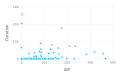

In [216]:
plot(data, x = :d2h, y = :Duration)

#### 2.2 Surverse vs accumulation de pluie sur 2h et 4h

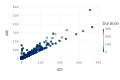

In [217]:
plot(data, x = :d2h, y = :d4h, color = :Duration)

#### 2.3 Surverse vs accumulation de pluie sur 2h et 4h

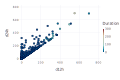

In [218]:
plot(data, x = :d12h, y = :d24h, color = :Duration)

D24H

In [219]:
# TODO: Analyse exploratoire

#### 2.4 Variables crees

###### MOIS

On classifie chaque jour selon le mois dont il appartient. Nous pensons que le mois de l'année influence le montant de pluie qu'il y aura.

In [220]:
function addMonth(file::DataFrame)
    fileSize = size(file, 1)
    d = Array{Int64}(undef,fileSize)
    for i=1:length(file[:Date])
        date = file[:Date][i];
        month = Dates.month(date)
        if month == 5
            d[i] = 0
        elseif month == 6
            d[i] = 1
        elseif month == 7
            d[i] = 2
        elseif month == 8
            d[i] = 3
        elseif month == 9
            d[i] = 4
        elseif month == 10
            d[i] = 5
        end
    end
    file[:Month] = d
end

addMonth(data)
addMonth(test)

first(data, 5)

,Date,Duration,d15min,d30min,d45min,d1h,d2h,d3h,d4h
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2013-06-01,0.0,69.0,100.0,115.0,117.0,117.0,117.0,117.0
2,2013-06-02,0.0,27.0,32.0,33.0,35.0,64.0,96.0,117.0
3,2013-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2013-06-06,0.0,5.0,7.0,9.0,12.0,19.0,26.0,28.0


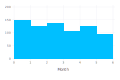

In [233]:
# TODO: Analyse exploratoire
plot(data, x=:Month, Geom.histogram(bincount=6))

## 3. Nettoyage des données

In [222]:
dropmissing(data)

,Date,Duration,d15min,d30min,d45min,d1h,d2h,d3h,d4h
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2013-06-01,0.0,69.0,100.0,115.0,117.0,117.0,117.0,117.0
2,2013-06-02,0.0,27.0,32.0,33.0,35.0,64.0,96.0,117.0
3,2013-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2013-06-06,0.0,5.0,7.0,9.0,12.0,19.0,26.0,28.0
6,2013-06-08,0.0,14.0,20.0,24.0,29.0,43.0,50.0,56.0
7,2013-06-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2013-06-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2013-06-11,13.0,18.0,32.0,43.0,54.0,87.0,118.0,143.0


## 4. Préparation

#### 4.1 Verification de multicolinearite

In [223]:
variables = names(data[3:14])

12-element Array{String,1}:
 "d15min"
 "d30min"
 "d45min"
 "d1h"
 "d2h"
 "d3h"
 "d4h"
 "d6h"
 "d8h"
 "d12h"
 "d24h"
 "Month"

In [224]:
df = DataFrame(Variable = String[], VIF = Float64[])

for variable in combinations(variables,1)
    y = data[:, variable[] ]
    ȳ = mean(y)
    X = hcat(ones(n), convert(Matrix{Float64}, data[:, setdiff(variables, variable)]) )
    β̂ = X\y
    ŷ = X*β̂
    e = y-ŷ
    SSE = e'*e
    SST = sum( (y .- ȳ).^2 )
    R² = 1 - SSE/SST
    VIF = 1/(1-R²)
    push!(df, [variable[], VIF])
end

df


,Variable,VIF
,String,Float64
1,d15min,37.9708
2,d30min,138.805
3,d45min,258.166
4,d1h,170.654
5,d2h,104.92
6,d3h,128.618
7,d4h,135.182
8,d6h,62.1981
9,d8h,30.4052


### Selection des variables explicatives par comparaison de R2 

In [225]:
y = data[:, :Duration]
ȳ = mean(y)
SST = sum( (y .- ȳ).^2 )


df = DataFrame(Variable = Vector{String}[], R² = Float64[])

for variable in combinations(variables)
    
    p = length(variable)
    
    X = hcat(ones(n), convert(Matrix{Float64},data[:, variable]))
    
    
    β̂ = X\y
    ŷ = X*β̂

    e = y-ŷ

    SSE = e'*e

    R²aj =  1 - SSE/SST * (n-1)/(n-p)
    
    push!(df, [variable, R²aj])
#     println(variable)
    
end

sort(df, :R², rev=true)


,Variable,R²
,Array…,Float64
1,"[""d1h"", ""d2h"", ""d6h"", ""Month""]",0.119577
2,"[""d1h"", ""d2h"", ""d6h"", ""d12h"", ""Month""]",0.118729
3,"[""d1h"", ""d2h"", ""d6h"", ""d8h"", ""Month""]",0.118673
4,"[""d1h"", ""d2h"", ""d8h"", ""Month""]",0.118655
5,"[""d1h"", ""d2h"", ""d6h"", ""d24h"", ""Month""]",0.118627
6,"[""d45min"", ""d1h"", ""d2h"", ""d6h"", ""Month""]",0.118607
7,"[""d15min"", ""d1h"", ""d2h"", ""d6h"", ""Month""]",0.118584
8,"[""d1h"", ""d2h"", ""d3h"", ""d6h"", ""Month""]",0.118437
9,"[""d1h"", ""d2h"", ""d4h"", ""d6h"", ""Month""]",0.118432


## 5. Regression lineaire

Avec les variables ["d1h", "d2h", "d6h", "Month"] ayant le R^2 le plus eleve

In [226]:
x_15 = data[:, :d15min]
x_30 = data[:, :d30min]
x_45 = data[:, :d45min]
x_1h = data[:, :d1h]
x_2h = data[:, :d2h]
x_3h = data[:, :d3h]
x_4h = data[:, :d4h]
x_6h = data[:, :d6h]
x_8h = data[:, :d8h]
x_12h = data[:, :d12h]
x_24h = data[:, :d24h]
x_month = data[:, :Month]
y = data[:, :Duration]
n = length(y)

740

In [227]:
X = hcat(ones(n), x_1h, x_2h, x_6h, x_month)
β̂ = X \ y
println("Les estimations des coefficient de régression sont β̂ = ", β̂)

Les estimations des coefficient de régression sont β̂ = [-1.7404104252273858, -0.26590869321144756, 0.2409116838708066, 0.0604008474122834, 0.7855525301248649]


In [228]:
x = DataFrame()
x.d1h = test[:, :d1h]
x.d2h = test[:, :d2h]
x.d6h = test[:, :d6h]
x.Month = test[:, :Month]
X = convert(Array{Float64}, x)
#X = transpose(X)

101×4 Array{Float64,2}:
   0.0    0.0    0.0  1.0
  16.0   26.0   49.0  1.0
  16.0   23.0   52.0  1.0
   2.0    2.0    2.0  1.0
   4.0    9.0   32.0  1.0
   0.0    0.0    0.0  0.0
   0.0    0.0    0.0  0.0
   0.0    0.0    0.0  2.0
   0.0    3.0    3.0  2.0
   0.0    0.0    0.0  2.0
  61.0   96.0  170.0  0.0
   0.0    0.0    0.0  0.0
   2.0    2.0    4.0  0.0
   ⋮                  
   0.0    0.0    2.0  3.0
   0.0    0.0    0.0  3.0
   2.0    2.0    2.0  3.0
  19.0   22.0   37.0  4.0
  13.0   19.0   23.0  4.0
  20.0   23.0   25.0  4.0
   5.0    5.0   25.0  4.0
 285.0  332.0  504.0  5.0
  15.0   33.0   51.0  5.0
   0.0    0.0    0.0  5.0
   2.0    2.0    2.0  5.0
  20.0   33.0   61.0  5.0

In [229]:
beta = β̂[2:end]

4-element Array{Float64,1}:
 -0.26590869321144756
  0.2409116838708066
  0.0604008474122834
  0.7855525301248649

In [231]:
test[:, :Duration] .= X*beta
prediction = select(test, :Date, :Duration)
CSV.write("benchmark_predictions.csv",prediction)

"benchmark_predictions.csv"

In [234]:
prediction

,Date,Duration
,Date,Float64
1,2013-06-03,0.785553
2,2013-06-07,5.75436
3,2013-06-12,5.21283
4,2013-06-13,0.85636
5,2013-06-23,3.82295
6,2014-05-23,0.0
7,2014-05-29,0.0
8,2014-07-14,1.57111
9,2014-07-16,2.47504
